In [2]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


/tmp/ipykernel_8521/184238777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()#faz um group dos carros com mesma quilometragem e realiza uma media dos mesmo


<Axes: xlabel='Mileage'>

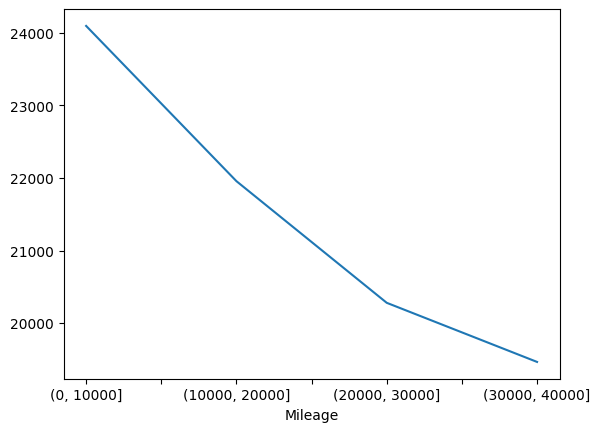

In [5]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())
groups['Price'].plot.line()

In [8]:
import statsmodels.api as sm  
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
est.summary()

/tmp/ipykernel_8521/1686303437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.95e-77
Time:                        19:01:20   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.000    2.08e+04    2.19e+04
Mileage    -1272.3412    279.567     -4.551      0.000   -1821.112    -723.571
Cylinder    5587.4472    279.527     19.989      0.000    5038.754    6136.140
Doors      -1404.5513    279.446     -5.026      0.000   -1953.085    -856.018
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Activity
Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [9]:
# Atividade: Testando diferentes números de portas 
for portas in [2, 3, 4, 5, 6, 8, 10]:
    scaled = scale.transform([[45000, 8, portas]])
    scaled = np.insert(scaled[0], 0, 1)
    predicted = est.predict(scaled)
    print(f"{portas} portas: ${predicted[0]:,.2f}")

2 portas: $30,964.38
3 portas: $29,311.27
4 portas: $27,658.16
5 portas: $26,005.04
6 portas: $24,351.93
8 portas: $21,045.70
10 portas: $17,739.48
